In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/project')

In [4]:
!pip install --upgrade pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.9/78.2 GB disk)


In [6]:
!apt-get update
!apt-get install libgl1-mesa-glx -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,128 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,190 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14 http://archive.ubuntu.c

In [7]:
import os
os.chdir("/content/drive/MyDrive/project/Detection")

In [8]:
# import os
# import shutil
# import random
# from pathlib import Path

# images_dir = Path('crane_detection_dataset/images')
# labels_dir = Path('crane_detection_dataset/labels')
# train_images_dir = Path('crane_detection_dataset/train/images')
# train_labels_dir = Path('crane_detection_dataset/train/labels')
# val_images_dir = Path('crane_detection_dataset/val/images')
# val_labels_dir = Path('crane_detection_dataset/val/labels')

# train_images_dir.mkdir(parents=True, exist_ok=True)
# train_labels_dir.mkdir(parents=True, exist_ok=True)
# val_images_dir.mkdir(parents=True, exist_ok=True)
# val_labels_dir.mkdir(parents=True, exist_ok=True)

# image_extensions = ['*.jpg', '*.png']
# image_files = []
# for ext in image_extensions:
#     image_files.extend(images_dir.glob(ext))


# random.shuffle(image_files)


# split_index = int(0.8 * len(image_files))
# train_files = image_files[:split_index]
# val_files = image_files[split_index:]

# def copy_files(file_list, src_dir, dest_dir):
#     for file_path in file_list:
#         shutil.copy(file_path, dest_dir)
#         label_file = file_path.stem + '.txt'
#         shutil.copy(src_dir / label_file, dest_dir.parent / 'labels' / label_file)


# copy_files(train_files, labels_dir, train_images_dir)


# copy_files(val_files, labels_dir, val_images_dir)

# print(f"Training files: {len(train_files)}, Validation files: {len(val_files)}")


In [9]:
%%writefile detr_model.yaml
train: "/content/drive/MyDrive/project/Detection/crane_detection_dataset/train"
val: "/content/drive/MyDrive/project/Detection/crane_detection_dataset/val"

nc: 2
names: ['mobile crane', 'tower crane']



Overwriting detr_model.yaml


In [10]:
!ls

crane_detection_dataset  detr-model.ipynb  detr_model.yaml  rtdetr-l.pt  runs  yolov8n.pt


In [11]:
from ultralytics import RTDETR
model = RTDETR(model='rtdetr-l.pt')
result=model.train(
        name='RT_DETR_001',
        epochs=20,
        imgsz=640,
        batch=16,
        optimizer='SGD',
        data='detr_model.yaml',
    )

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=detr_model.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=RT_DETR_0019, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]


Overriding model.yaml nc=80 with nc=2
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/project/Detection/crane_detection_dataset/train/labels.cache... 3042 images, 30 backgrounds, 0 corrupt: 100%|██████████| 3042/3042 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/project/Detection/crane_detection_dataset/val/labels.cache... 761 images, 8 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:00<?, ?it/s]


Plotting labels to runs/detect/RT_DETR_0019/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/RT_DETR_0019
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/20        14G     0.6514      1.909     0.6618          8        640: 100%|██████████| 191/191 [12:17<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]

                   all        761        935      0.699      0.612      0.619      0.424



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       2/20      13.8G     0.5362     0.7457     0.4128         10        640: 100%|██████████| 191/191 [03:53<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


                   all        761        935      0.873      0.725      0.795      0.518

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       3/20      13.9G     0.4333     0.6363     0.3383         12        640: 100%|██████████| 191/191 [03:47<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.40it/s]


                   all        761        935      0.868      0.798      0.877      0.678

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       4/20        14G     0.3103     0.6044     0.2578          7        640: 100%|██████████| 191/191 [03:46<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.31it/s]


                   all        761        935      0.896      0.753      0.843      0.653

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       5/20      13.8G      0.302     0.5976     0.2572          6        640: 100%|██████████| 191/191 [03:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.40it/s]

                   all        761        935      0.905      0.843      0.909        0.7



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       6/20        14G     0.2934     0.5627     0.2427          5        640: 100%|██████████| 191/191 [03:48<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.40it/s]

                   all        761        935      0.912      0.839      0.921      0.742



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       7/20      13.9G     0.2834     0.5195     0.2344          6        640: 100%|██████████| 191/191 [03:48<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.43it/s]


                   all        761        935      0.909      0.878      0.934      0.769

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       8/20      13.9G     0.2722     0.5183     0.2236          8        640: 100%|██████████| 191/191 [03:46<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.43it/s]


                   all        761        935      0.903      0.868      0.934      0.769

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       9/20      13.9G     0.2639      0.501     0.2104          5        640: 100%|██████████| 191/191 [03:46<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.44it/s]

                   all        761        935      0.929      0.909      0.951      0.788



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      10/20        14G     0.2604      0.491     0.2082          1        640: 100%|██████████| 191/191 [03:46<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.39it/s]

                   all        761        935      0.921      0.874      0.944      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      11/20      13.9G     0.2074     0.3783     0.2032          4        640: 100%|██████████| 191/191 [03:48<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.44it/s]


                   all        761        935      0.914      0.906      0.956      0.803

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      12/20        14G     0.1958     0.3548     0.1894          3        640: 100%|██████████| 191/191 [03:43<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.37it/s]

                   all        761        935      0.904      0.907      0.953      0.799



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      13/20      13.8G     0.1871     0.3397     0.1803          3        640: 100%|██████████| 191/191 [03:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.37it/s]

                   all        761        935      0.936      0.898      0.958       0.81



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      14/20        14G     0.1829     0.3385     0.1764          2        640: 100%|██████████| 191/191 [03:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.47it/s]


                   all        761        935      0.911      0.927      0.963      0.822

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      15/20      13.9G     0.1712     0.3216     0.1644          2        640: 100%|██████████| 191/191 [03:44<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:18<00:00,  1.29it/s]


                   all        761        935       0.93      0.935      0.966      0.829

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      16/20        14G     0.1641     0.3228     0.1609          1        640: 100%|██████████| 191/191 [03:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.37it/s]

                   all        761        935       0.93      0.928       0.97      0.831



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      17/20      13.8G     0.1569     0.2953     0.1557          2        640: 100%|██████████| 191/191 [03:44<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.44it/s]


                   all        761        935      0.926      0.936      0.966      0.836

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      18/20        14G     0.1538     0.2907     0.1509          3        640: 100%|██████████| 191/191 [03:45<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.39it/s]

                   all        761        935      0.931      0.933      0.973      0.841



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      19/20      13.8G     0.1463     0.2805     0.1436          2        640: 100%|██████████| 191/191 [03:44<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:17<00:00,  1.38it/s]

                   all        761        935      0.922      0.938      0.968      0.844



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/191 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      20/20      13.9G     0.1429     0.2688     0.1413          2        640: 100%|██████████| 191/191 [03:44<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


                   all        761        935      0.932      0.939       0.97      0.843

20 epochs completed in 1.514 hours.
Optimizer stripped from runs/detect/RT_DETR_0019/weights/last.pt, 66.1MB
Optimizer stripped from runs/detect/RT_DETR_0019/weights/best.pt, 66.1MB

Validating runs/detect/RT_DETR_0019/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


rt-detr-l summary: 494 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.19it/s]


                   all        761        935      0.921      0.938      0.968      0.844
          mobile crane        399        495      0.909      0.931      0.965      0.836
           tower crane        354        440      0.933      0.945      0.971      0.852
Speed: 0.3ms preprocess, 15.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/RT_DETR_0019


In [12]:
model = YOLO("/content/drive/MyDrive/project/Detection/runs/detect/RT_DETR_0018/weights/best.pt")

In [13]:
results = model("/content/drive/MyDrive/project/Detection/crane_detection_dataset/images/A-MC-1-_png.rf.b0cfdd179ba30a5b5cd3b8aefddcb9da.jpg")


image 1/1 /content/drive/MyDrive/project/Detection/crane_detection_dataset/images/A-MC-1-_png.rf.b0cfdd179ba30a5b5cd3b8aefddcb9da.jpg: 640x640 1 mobile crane, 89.2ms
Speed: 2.1ms preprocess, 89.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['epoch', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss',
                'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
                'val/giou_loss', 'val/cls_loss', 'val/l1_loss',
                'lr/pg0', 'lr/pg1', 'lr/pg2']
df = pd.read_csv('/content/drive/MyDrive/project/Detection/runs/detect/RT_DETR_0018/results.csv', names=column_names, skiprows=1)

In [15]:
epochs = df['epoch']
train_giou_loss = df['train/giou_loss']
train_cls_loss = df['train/cls_loss']
train_l1_loss = df['train/l1_loss']
val_giou_loss = df['val/giou_loss']
val_cls_loss = df['val/cls_loss']
val_l1_loss = df['val/l1_loss']
metrics_precision = df['metrics/precision(B)']
metrics_recall = df['metrics/recall(B)']
metrics_mAP50 = df['metrics/mAP50(B)']
metrics_mAP50_95 = df['metrics/mAP50-95(B)']

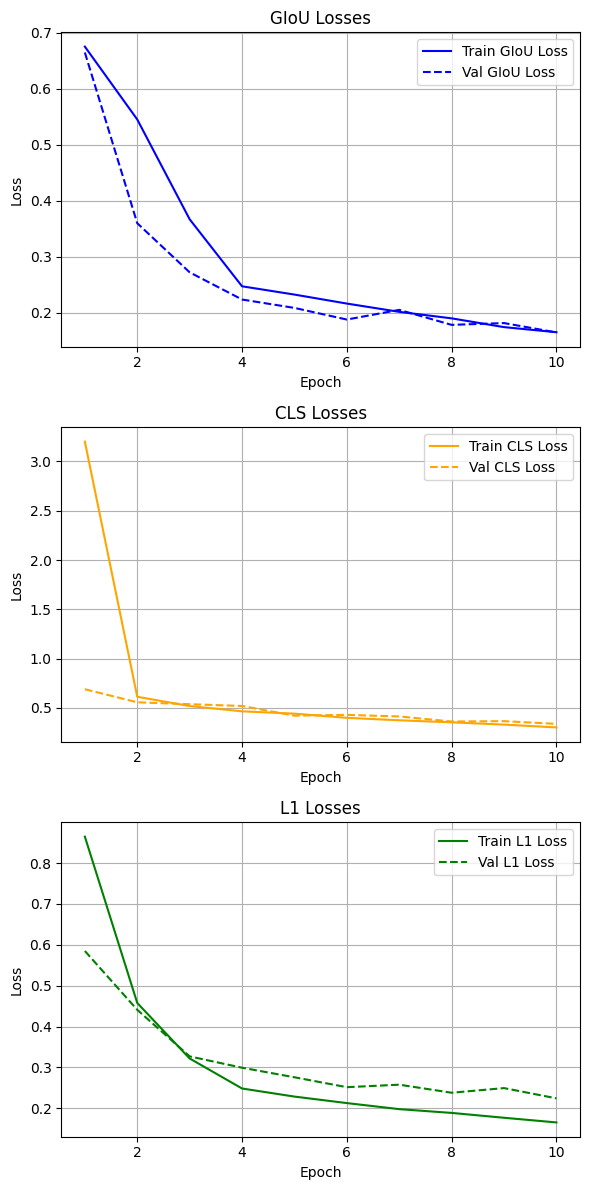

In [16]:
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.plot(epochs, train_giou_loss, label='Train GIoU Loss', color='blue')
plt.plot(epochs, val_giou_loss, label='Val GIoU Loss', linestyle='--', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GIoU Losses')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(epochs, train_cls_loss, label='Train CLS Loss', color='orange')
plt.plot(epochs, val_cls_loss, label='Val CLS Loss', linestyle='--', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CLS Losses')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(epochs, train_l1_loss, label='Train L1 Loss', color='green')
plt.plot(epochs, val_l1_loss, label='Val L1 Loss', linestyle='--', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('L1 Losses')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


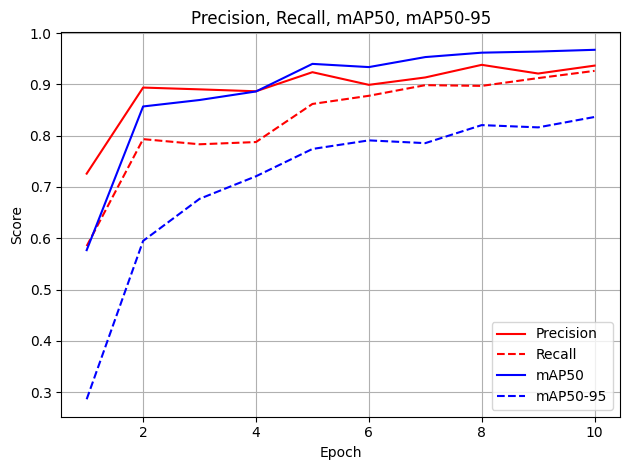

In [17]:
plt.plot(epochs, metrics_precision, label='Precision', color='red')
plt.plot(epochs, metrics_recall, label='Recall', linestyle='--', color='red')
plt.plot(epochs, metrics_mAP50, label='mAP50', color='blue')
plt.plot(epochs, metrics_mAP50_95, label='mAP50-95', linestyle='--', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision, Recall, mAP50, mAP50-95')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
